<div id="toc"><h1>Table of Contents</h1></div>

<div id="backTotop" class="alert alert-block alert-info">
    <ol>
        <li><a href="#bsnobjcts">Business Objectives</a></li>
        <li value="2"><a href="#dtprocess">Data preprocessing</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>2.1 <a href="#remdplctval">Removing Duplicated Values</a></li>
                <li>2.2 <a href="#splittrandevsets">Splitting the Dataset into Training, Test, Dev Sets</a></li>
                <li>2.3 <a href="#eplxdata">Exploring the Data</a></li>
                <li>2.4 <a href="#outliershandling">Detecting and Handling Outliers</a></li>
                <li>2.5 <a href="#detecmisval">Detecting and Imputing Missing Values</a></li>
            </ol>
        </li>
        <li><a href="#edavis">Exploratory Data Analysis (EDA) and Data Visualization</a></li>
        <li><a href="#feslecenginering">Feature Selection and Engineering</a>
            <ol style="list-style-type:none;padding-left:0">
                <li>4.1 <a href="#hypotesting">Hypothesis Testing</a></li>
                <li>4.2 <a href="#corrmatrix">Correlation Matrix</a></li>
                <li>4.3 <a href="#iofeselect">Numerical-Categorical Feature Selection</a></li>
            </ol>
        </li>
        <li><a href="#modselbuild">Model Selection and Building</a></li>
    </ol>
</div>

<div id="bsnobjcts">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">1. Business Objectives</div>
</div>

I'm using transaction data from credit card transactions that occurred over two days in September 2013 by European cardholders.

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The data has been anonymized using PCA transformation. The objective is to create a machine learning model that predicts whether the transaction is fraudulent or not using the features provided.

<div id="dtprocess">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">2. Data preprocessing</div>
</div>

In [1]:
from utils import *

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

<div id="remdplctval">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.1 Removing Duplicated Values</div>
</div>

In [5]:
df.duplicated().sum().sum()

1081

In [6]:
df[df.duplicated(keep=False)].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0


In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum().sum()

0

In [9]:
df = df.reset_index(drop=True)

<div id="splittrandevsets">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.2 Splitting the Dataset into Training, Test, Dev Sets</div>
</div>

In [10]:
X = df.drop(columns="Class", axis=1)
y = df["Class"]

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30, random_state=rst, stratify=y)

In [12]:
print(f"X.shape: {X.shape}, y.shape: {y.shape}\n")
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (283726, 30), y.shape: (283726,)

X_train.shape: (198608, 30), y_train.shape: (198608,)
X_test.shape: (85118, 30), y_test.shape: (85118,)


In [13]:
print(f"y_train:\n{y_train.value_counts()}")
print(f"y_test:\n{y_test.value_counts()}")

y_train:
0    198277
1       331
Name: Class, dtype: int64
y_test:
0    84976
1      142
Name: Class, dtype: int64


In [14]:
df = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [15]:
print(f"train shape: {df.shape}")
print(f"test shape: {test.shape}")

train shape: (198608, 31)
test shape: (85118, 31)


<div id="eplxdata">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.3 Exploring the Data</div>
</div>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198608 entries, 256381 to 66795
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    198608 non-null  float64
 1   V1      198608 non-null  float64
 2   V2      198608 non-null  float64
 3   V3      198608 non-null  float64
 4   V4      198608 non-null  float64
 5   V5      198608 non-null  float64
 6   V6      198608 non-null  float64
 7   V7      198608 non-null  float64
 8   V8      198608 non-null  float64
 9   V9      198608 non-null  float64
 10  V10     198608 non-null  float64
 11  V11     198608 non-null  float64
 12  V12     198608 non-null  float64
 13  V13     198608 non-null  float64
 14  V14     198608 non-null  float64
 15  V15     198608 non-null  float64
 16  V16     198608 non-null  float64
 17  V17     198608 non-null  float64
 18  V18     198608 non-null  float64
 19  V19     198608 non-null  float64
 20  V20     198608 non-null  float64
 21  V21   

<div id="outliershandling">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.4 Detecting and Handling Outliers</div>
</div>

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000
mean,94915.874194,0.005110,-0.004211,0.002225,0.000167,0.005016,-0.000353,0.001579,-0.000027,-0.003573,-0.001279,-0.000976,-0.000628,0.000987,-0.000863,0.000549,0.001792,-0.001112,0.002147,0.000718,0.000761,0.000803,-0.000037,-0.000383,0.000794,-0.000608,0.000302,0.001509,0.001568,88.321679,0.001667
std,47485.527892,1.947329,1.646230,1.506249,1.419313,1.357244,1.324724,1.198614,1.174068,1.094811,1.072300,1.019369,0.993239,0.995029,0.954925,0.913558,0.873177,0.842606,0.836651,0.814301,0.754797,0.726609,0.724693,0.619957,0.604811,0.520734,0.481012,0.391031,0.329685,242.613439,0.040790
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-32.092129,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.553697,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-6.938297,-23.646890,-34.830382,-9.499423,-32.828995,-2.824849,-8.696627,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54273.750000,-0.915838,-0.599308,-0.887008,-0.849299,-0.688458,-0.767864,-0.552417,-0.208814,-0.644773,-0.534169,-0.763007,-0.405237,-0.647179,-0.427282,-0.581487,-0.466011,-0.484100,-0.498260,-0.455562,-0.211165,-0.228347,-0.541831,-0.161848,-0.354003,-0.318287,-0.326227,-0.070467,-0.052454,5.700000,0.000000
50%,84857.000000,0.017120,0.064553,0.177689,-0.021783,-0.052050,-0.275956,0.041112,0.022225,-0.052730,-0.093569,-0.032512,0.137819,-0.012324,0.048826,0.049265,0.069176,-0.065560,-0.000728,0.005293,-0.062125,-0.029028,0.006670,-0.011426,0.041124,0.015730,-0.051608,0.001450,0.011547,22.080000,0.000000
75%,139372.250000,1.315232,0.802486,1.026722,0.744018,0.613899,0.397925,0.572347,0.325911,0.594273,0.455951,0.739536,0.615491,0.663008,0.491024,0.647759,0.523658,0.396436,0.502384,0.459706,0.133446,0.186512,0.528889,0.147990,0.440287,0.350386,0.239481,0.091523,0.078860,77.710000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,21.393069,34.303177,19.587773,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,7.059132,8.538195,4.712398,5.572113,38.117209,27.202839,10.503090,22.528412,4.016342,7.519589,3.517346,12.152401,33.847808,18910.000000,1.000000


Since the features are anonymized, we cannot remove the outliers.

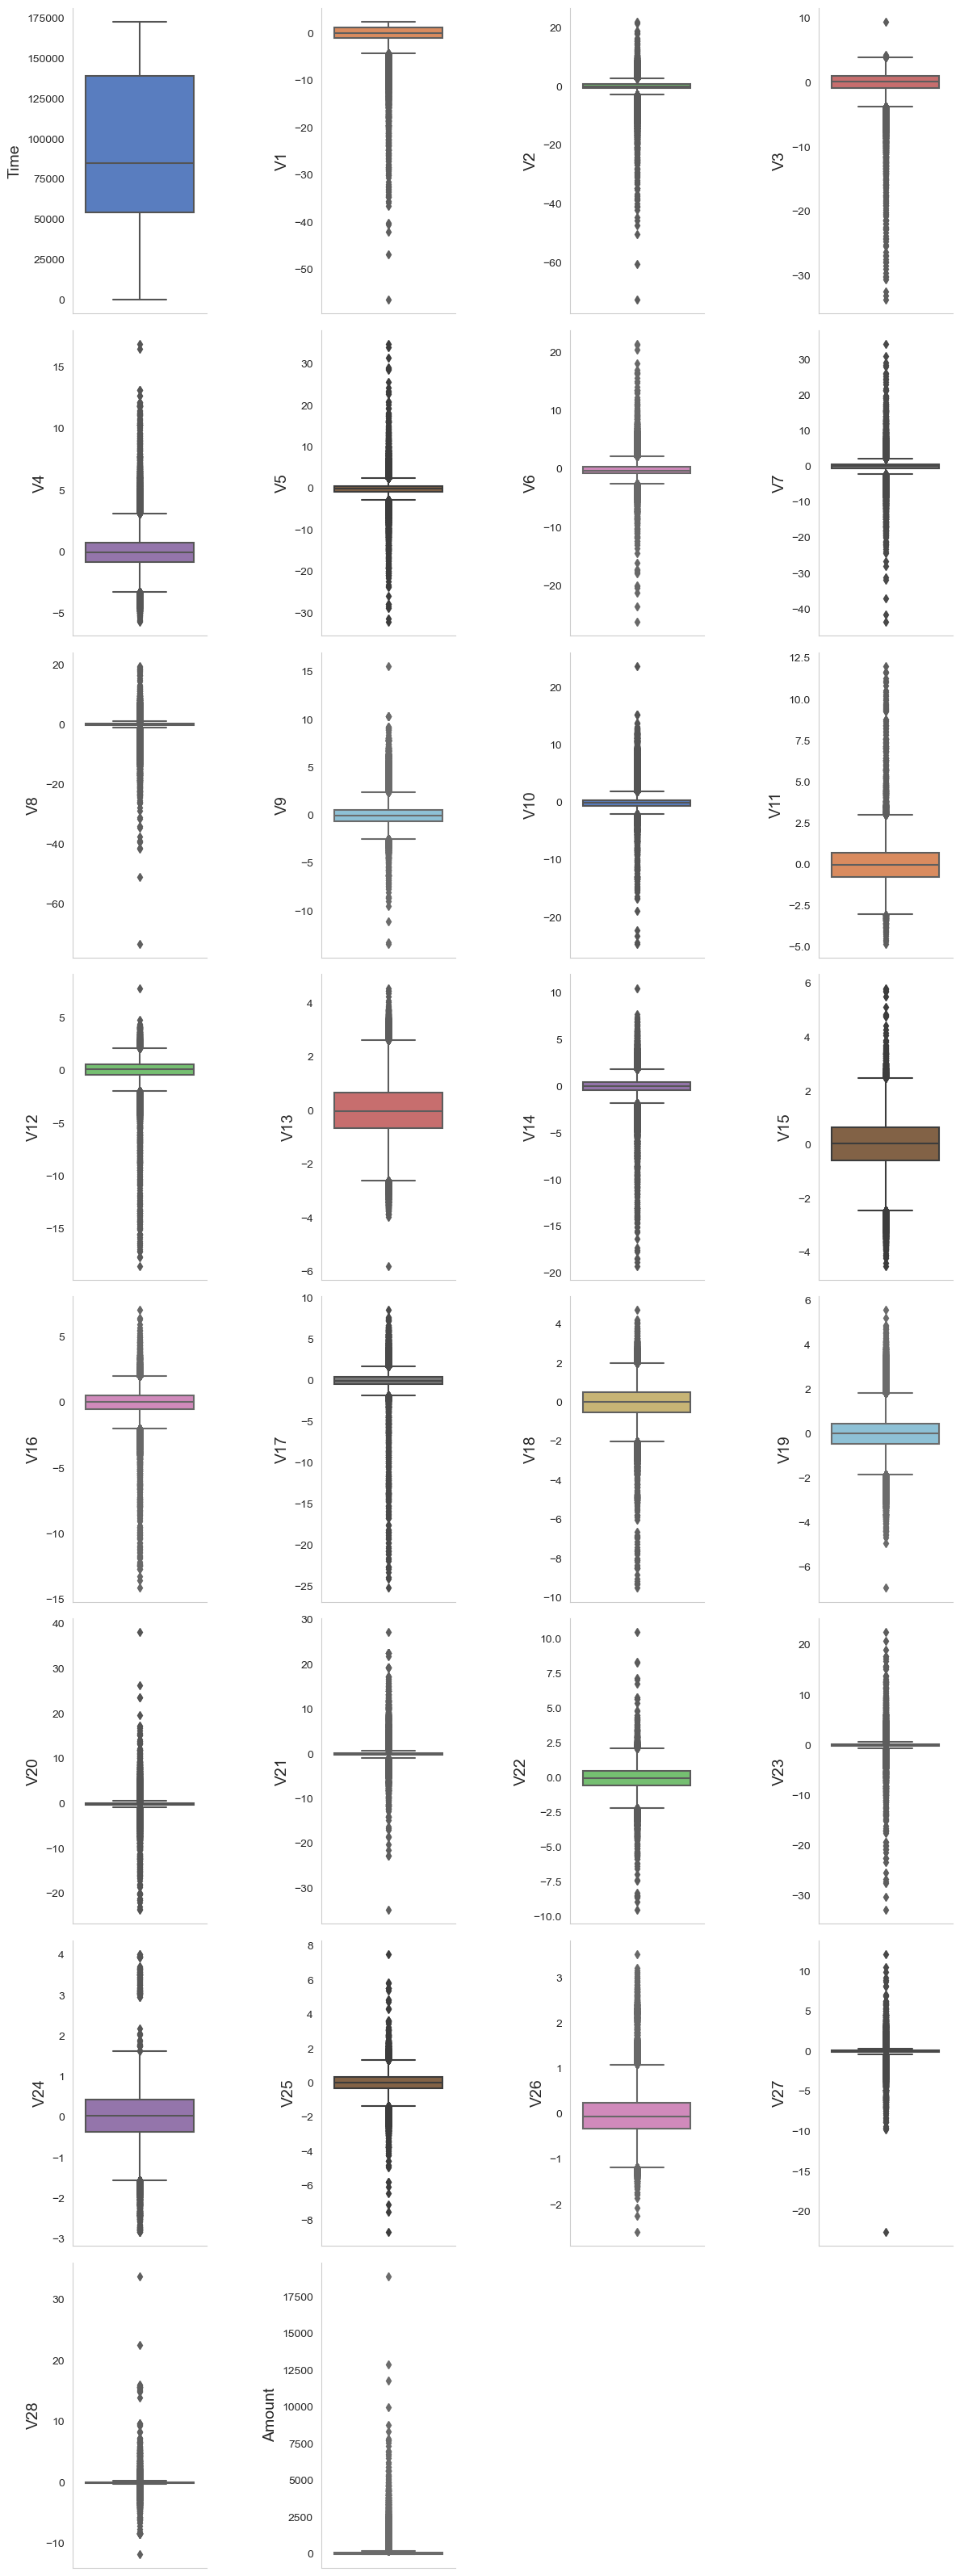

In [18]:
outliers_graph(df, df.drop(columns="Class", axis=1).columns.to_list())

<div id="detecmisval">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">2.5 Detecting and Imputing Missing Values</div>
</div>

In [19]:
df.isnull().sum().sum()

0

<div id="edavis">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">3. Exploratory Data Analysis (EDA) and Data Visualization</div>
</div>

In [20]:
df["Class"].value_counts()

0    198277
1       331
Name: Class, dtype: int64

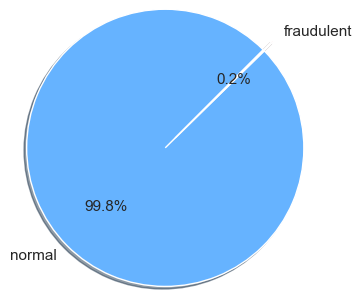

In [21]:
target_dist(df, "Class", "normal", "fraudulent")

In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000
mean,94915.874194,0.005110,-0.004211,0.002225,0.000167,0.005016,-0.000353,0.001579,-0.000027,-0.003573,-0.001279,-0.000976,-0.000628,0.000987,-0.000863,0.000549,0.001792,-0.001112,0.002147,0.000718,0.000761,0.000803,-0.000037,-0.000383,0.000794,-0.000608,0.000302,0.001509,0.001568,88.321679,0.001667
std,47485.527892,1.947329,1.646230,1.506249,1.419313,1.357244,1.324724,1.198614,1.174068,1.094811,1.072300,1.019369,0.993239,0.995029,0.954925,0.913558,0.873177,0.842606,0.836651,0.814301,0.754797,0.726609,0.724693,0.619957,0.604811,0.520734,0.481012,0.391031,0.329685,242.613439,0.040790
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-32.092129,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.553697,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-6.938297,-23.646890,-34.830382,-9.499423,-32.828995,-2.824849,-8.696627,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54273.750000,-0.915838,-0.599308,-0.887008,-0.849299,-0.688458,-0.767864,-0.552417,-0.208814,-0.644773,-0.534169,-0.763007,-0.405237,-0.647179,-0.427282,-0.581487,-0.466011,-0.484100,-0.498260,-0.455562,-0.211165,-0.228347,-0.541831,-0.161848,-0.354003,-0.318287,-0.326227,-0.070467,-0.052454,5.700000,0.000000
50%,84857.000000,0.017120,0.064553,0.177689,-0.021783,-0.052050,-0.275956,0.041112,0.022225,-0.052730,-0.093569,-0.032512,0.137819,-0.012324,0.048826,0.049265,0.069176,-0.065560,-0.000728,0.005293,-0.062125,-0.029028,0.006670,-0.011426,0.041124,0.015730,-0.051608,0.001450,0.011547,22.080000,0.000000
75%,139372.250000,1.315232,0.802486,1.026722,0.744018,0.613899,0.397925,0.572347,0.325911,0.594273,0.455951,0.739536,0.615491,0.663008,0.491024,0.647759,0.523658,0.396436,0.502384,0.459706,0.133446,0.186512,0.528889,0.147990,0.440287,0.350386,0.239481,0.091523,0.078860,77.710000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,21.393069,34.303177,19.587773,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,7.059132,8.538195,4.712398,5.572113,38.117209,27.202839,10.503090,22.528412,4.016342,7.519589,3.517346,12.152401,33.847808,18910.000000,1.000000


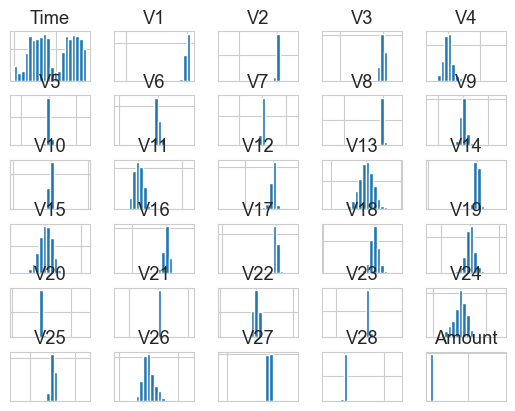

In [23]:
ax = df.drop(columns="Class", axis=1).hist(bins=20)

# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

plt.show()

<div id="feslecenginering">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">4. Feature Selection and Engineering</div>
</div>

**Important metrics**:
1. **PR AUC**: because the positive class is more important, and we want to adjust the decision threshold.
2. **F2 score**: because false negatives are more costly. The financial impact of allowing fraud is often higher than the cost of a few legitimate transactions being wrongly flagged.

<div id="hypotesting">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">4.1 Hypothesis Testing</div>
</div>

Null Hypothesis (H0):
There is no significant effect of time on the probability of a transaction being fraudulent or not.

Alternative Hypothesis (H1):
There is a significant effect of time on the probability of a transaction being fraudulent or not.

In [24]:
fraudulent = df[df['Class'] == 1]['Time']
normal = df[df['Class'] == 0]['Time']

t_stat, p_value = stats.ttest_ind(fraudulent, normal, equal_var=False)

print(f"Fraudulent: {fraudulent.shape}")
print(f"Normal: {normal.shape}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value:.10f}")

if p_value >= 0.05:
    print("(fail to reject H0) There is no significant effect of time on the probability of a transaction being fraudulent or not.")
else:
    print("(reject H0) There is a significant effect of time on the probability of a transaction being fraudulent or not.")


Fraudulent: (331,)
Normal: (198277,)
T-statistic: -4.587212571682288
P-value: 0.0000063820
(reject H0) There is a significant effect of time on the probability of a transaction being fraudulent or not.


<div id="corrmatrix">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">4.2 Correlation Matrix</div>
</div>

In [26]:
correlation_matrix = df.corr()

In [27]:
tidy_correlation = correlation_matrix.reset_index().melt(id_vars='index')
tidy_correlation.columns = ['Variable 1', 'Variable 2', 'Correlation']

In [28]:
# Remove self-correlations (where Variable 1 == Variable 2)
tidy_correlation = tidy_correlation[tidy_correlation['Variable 1'] != tidy_correlation['Variable 2']]

In [29]:
# Ensure unique pairs (Variable 1, Variable 2) and (Variable 2, Variable 1) are treated the same
tidy_correlation['Pair'] = tidy_correlation[['Variable 1', 'Variable 2']].apply(lambda x: tuple(sorted(x)), axis=1)

In [30]:
tidy_correlation['Strength'] = tidy_correlation['Correlation'].apply(correlation_strength)

As we can see, there is no multicollinearity.

In [31]:
filtered_correlation = tidy_correlation[(tidy_correlation['Strength'] != 'Weak')]
# filtered_correlation = tidy_correlation[(tidy_correlation['Correlation'] > 0.3) | (tidy_correlation['Correlation'] < -0.3)]

filtered_correlation = filtered_correlation.drop_duplicates(subset='Pair').drop(columns='Pair')
filtered_correlation = filtered_correlation.sort_values(by='Correlation', ascending=False)
filtered_correlation

,Variable 1,Variable 2,Correlation,Strength
649,Amount,V20,0.379876,Moderate
246,Amount,V7,0.369173,Moderate
464,Class,V14,-0.304817,Moderate
557,Class,V17,-0.321210,Moderate
184,Amount,V5,-0.360188,Moderate
3,V3,Time,-0.421105,Moderate
91,Amount,V2,-0.536300,Moderate


In [32]:
corr_var = set(filtered_correlation["Variable 1"].unique()).union(set(filtered_correlation["Variable 2"].unique()))
print(corr_var)

{'V17', 'V2', 'V3', 'Class', 'V7', 'Amount', 'V20', 'V5', 'Time', 'V14'}


<div id="iofeselect">
    <div style="font-size:20pt;font-weight:700;padding:20px 0;line-height:1.2">4.3 Numerical-Categorical Feature Selection</div>
</div>

Input = numerical<br>
Output = categorical

In [33]:
X_train = df.drop(columns="Class", axis=1)
y_train = df["Class"]

In [34]:
X_test = test.drop(columns="Class", axis=1)
y_test= test["Class"]

**ANOVA f-test**

Number of features=30
V17: 22848.821442
V14: 20343.378863
V12: 14075.212818
V10: 9410.989504
V16: 7589.621479
V3: 7470.855673
V7: 6731.623747
V11: 4824.121770
V4: 3492.735614
V18: 2288.088626
V1: 1889.992474
V9: 1867.076035
V5: 1625.363092
V2: 1537.933949
V6: 405.171040
V19: 239.641115
V8: 209.156371
V21: 137.638457
V27: 133.610370
V20: 100.084364
V28: 29.133431
Time: 23.393942
V24: 12.076433
V25: 5.833290
V22: 5.520465
V26: 4.905213
Amount: 4.619583
V23: 3.442218
V15: 2.674374
V13: 1.337186


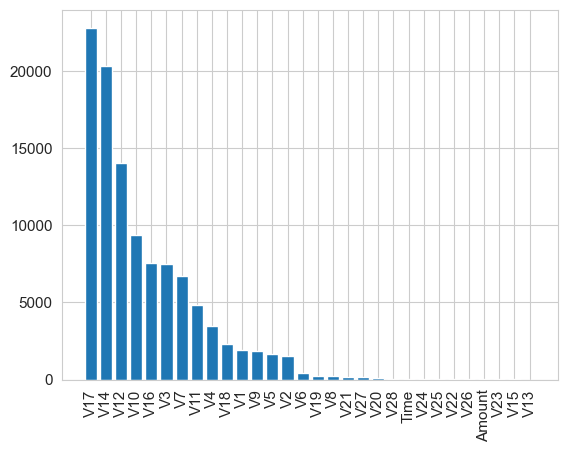

In [36]:
k = 'all'

X_train_fs, X_test_fs, fs, k = select_features(X_train, y_train, X_test, k=k)

sorted_indices = np.argsort(fs.scores_)[::-1]

if k == 'all':
    k = len(X_train.columns)
top_k_indices = sorted_indices[:k]  # Limit to the top k features
print(f'Number of features={k}')

for i in top_k_indices:
    print('%s: %f' % (X_train.columns[i], fs.scores_[i]))

sorted_scores = fs.scores_[top_k_indices]

plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), X_train.columns[top_k_indices], rotation=90)
plt.show()

From this result let's select **k = 14** (up to V2 feature)

**Using all features (baseline model)**

In [38]:
# no skill model, stratified random class predictions
# dummy_model = dummy.DummyClassifier(strategy='constant', constant=1)

In [39]:
baseline_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=200)

In [40]:
evaluate_model(baseline_model, X_train, y_train, X_test, y_test)

LogisticRegression
PR AUC: 0.574
F1 Score=0.683, Best Threshold=0.418
F2 Score=0.647, Best Threshold=0.177


In [41]:
for k in range(12, 17):
    X_train_fs, X_test_fs, fs, k = select_features(X_train, y_train, X_test, k)
    baseline_model.fit(X_train_fs, y_train)
    evaluate_model(baseline_model, X_train_fs, y_train, X_test_fs, y_test, k)

LogisticRegression
PR AUC: 0.675
F1 Score=0.766, Best Threshold=0.043
F2 Score=0.785, Best Threshold=0.026
k=12

LogisticRegression
PR AUC: 0.681
F1 Score=0.770, Best Threshold=0.110
F2 Score=0.780, Best Threshold=0.026
k=13

LogisticRegression
PR AUC: 0.681
F1 Score=0.768, Best Threshold=0.114
F2 Score=0.776, Best Threshold=0.028
k=14

LogisticRegression
PR AUC: 0.680
F1 Score=0.768, Best Threshold=0.052
F2 Score=0.776, Best Threshold=0.020
k=15

LogisticRegression
PR AUC: 0.681
F1 Score=0.768, Best Threshold=0.053
F2 Score=0.776, Best Threshold=0.028
k=16



Based on the PR AUC and F2 score results, it looks like **k = 13** is the best option.

<div id="modselbuild">
    <div style="font-size:25pt;font-weight:700;padding:20px 0;line-height:1.2">5. Model Selection and Building</div>
</div>

Yes, when you convert a DataFrame to a NumPy array, the index information is lost, and you only get the data itself. However, as long as you haven't shuffled or filtered the data after conversion, the rows in X_train and y_train will still correspond to each other in the same order they were in the original DataFrame.

In [42]:
df_m = df.copy()
test_m = test.copy()

In [43]:
train_column_names = df_m.columns.tolist()
test_column_names = test_m.columns.tolist()

In [44]:
df_m.shape, test_m.shape

((198608, 31), (85118, 31))

In [45]:
# retrieve numpy array, reset index
df_m = df_m.values
test_m = test_m.values

In [46]:
X_train, y_train = df_m[:, :-1], df_m[:, -1]
X_test, y_test = test_m[:, :-1], test_m[:, -1]

In [47]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [48]:
scaler = preprocessing.StandardScaler()

In [49]:
pipe_without_scaler = pipeline.Pipeline([
    ('selectkbest', feature_selection.SelectKBest(score_func=feature_selection.f_classif)),
    ('smote', over_sampling.SMOTE(sampling_strategy=0.1)),
    ('undersampler', under_sampling.RandomUnderSampler(sampling_strategy=0.5)),
    ('clf', tree.DecisionTreeClassifier())  # Placeholder
])

In [50]:
pipe_with_scaler = pipeline.Pipeline([
    ('selectkbest', feature_selection.SelectKBest(score_func=feature_selection.f_classif)),
    ('smote', over_sampling.SMOTE(sampling_strategy=0.1)),
    ('undersampler', under_sampling.RandomUnderSampler(sampling_strategy=0.5)),
    ('scaler', scaler),
    ('clf', neighbors.KNeighborsClassifier())  # Placeholder
])

In [51]:
param_grid = [
    {
        'clf': [tree.DecisionTreeClassifier()],
        'selectkbest__k': range(12, 16)
    },
    {
        'clf': [neighbors.KNeighborsClassifier()],
        'selectkbest__k': range(12, 16)
    },
    {
        'clf': [ensemble.BaggingClassifier()],
        'selectkbest__k': range(12, 16),
        'clf__n_estimators': [100]
    },
    {
        'clf': [ensemble.RandomForestClassifier()],
        'selectkbest__k': range(12, 16),
        'clf__n_estimators': [100]
    },
    {
        'clf': [ensemble.ExtraTreesClassifier()],
        'selectkbest__k': range(12, 16),
        'clf__n_estimators': [100]
    },
]


In [52]:
# 5 splits, 2 repeat = 10 fold
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=rst) 

In [54]:
metric = metrics.make_scorer(pr_auc, needs_proba=True)

Total fit = number of fold (cv) * the number of different hyperparameter configurations (4, number of k)

In [56]:
best_params = run_grid_search(X_train, y_train)

Starting grid search for model: DecisionTreeClassifier
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Model: DecisionTreeClassifier
Best parameters found: {'clf': DecisionTreeClassifier(), 'selectkbest__k': 14}
Best estimator: Pipeline(steps=[('selectkbest', SelectKBest(k=14)),
                ('smote', SMOTE(sampling_strategy=0.1)),
                ('undersampler', RandomUnderSampler(sampling_strategy=0.5)),
                ('clf', DecisionTreeClassifier())])
Best Score of Mean PR AUC: 0.4962078730393268
Time taken for DecisionTreeClassifier: 41.98 seconds

Starting grid search for model: KNeighborsClassifier
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Model: KNeighborsClassifier
Best parameters found: {'clf': KNeighborsClassifier(), 'selectkbest__k': 14}
Best estimator: Pipeline(steps=[('selectkbest', SelectKBest(k=14)),
                ('smote', SMOTE(sampling_strategy=0.1)),
                ('undersampler', RandomUnderSampler(sampling_strategy=0.5))

In [57]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

#### Classification Prediction

In [58]:
best_model = ensemble.ExtraTreesClassifier(n_estimators=100)
k = 15
best_model_name = "ExtraTreesClassifier"

In [59]:
pipe = pipeline.Pipeline([
    ('selectkbest', feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=k)),
    ('smote', over_sampling.SMOTE(sampling_strategy=0.1)),
    ('undersampler', under_sampling.RandomUnderSampler(sampling_strategy=0.5)),
    ('clf', best_model) 
])

In [60]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=15)),
                ('smote', SMOTE(sampling_strategy=0.1)),
                ('undersampler', RandomUnderSampler(sampling_strategy=0.5)),
                ('clf', ExtraTreesClassifier())])

In [61]:
y_pred = pipe.predict_proba(X_test)

In [62]:
y_pred_pos_probs = y_pred[:, 1]

In [63]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_pos_probs)
auc_score = metrics.auc(recall, precision)

f1_score = (2 * precision * recall) / (precision + recall)
ix_f1 = np.argmax(f1_score)

f2_score = (5 * precision * recall) / (4 * precision + recall)
ix_f2 = np.argmax(f2_score)

In [64]:
print(f'{best_model_name}')
print(f'PR AUC: {auc_score:.3f}')
print(f'F1 Score={f1_score[ix_f1]:.3f}, Best Threshold={thresholds[ix_f1]:.3f}')
print(f'F2 Score={f2_score[ix_f2]:.3f}, Best Threshold={thresholds[ix_f2]:.3f}')
print(f'Number of features={k}')

ExtraTreesClassifier
PR AUC: 0.812
F1 Score=0.834, Best Threshold=0.830
F2 Score=0.794, Best Threshold=0.570
Number of features=15


In [65]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [66]:
best_threshold = thresholds[ix_f2]

indices_0 = np.where(y_test == 0)[0]
indices_1 = np.where(y_test == 1)[0]

sample_indices_0 = np.random.choice(indices_0, size=10, replace=False)
sample_indices_1 = np.random.choice(indices_1, size=10, replace=False)

random_indices = np.concatenate([sample_indices_0, sample_indices_1])

np.random.shuffle(random_indices)

X_sample = X_test[random_indices]
y_sample = y_test[random_indices]

y_pred = pipe.predict_proba(X_sample)
y_pred_pos_probs = y_pred[:, 1]

y_pred_classes = (y_pred_pos_probs > best_threshold).astype(int)

for i in range(len(y_sample)):
    correct_prediction = y_pred_classes[i] == y_sample[i]
    result = "TRUE" if correct_prediction else "FALSE"
    
    print(f'Best Threshold={best_threshold:.3f}, Probability=%.3f, Predicted={y_pred_classes[i]}, expected={y_sample[i]} - {result}' % y_pred_pos_probs[i])


Best Threshold=0.570, Probability=0.020, Predicted=0, expected=1.0 - FALSE
Best Threshold=0.570, Probability=0.020, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=0.950, Predicted=1, expected=1.0 - TRUE
Best Threshold=0.570, Probability=0.030, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=0.000, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=0.980, Predicted=1, expected=1.0 - TRUE
Best Threshold=0.570, Probability=0.990, Predicted=1, expected=1.0 - TRUE
Best Threshold=0.570, Probability=0.970, Predicted=1, expected=1.0 - TRUE
Best Threshold=0.570, Probability=0.030, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=0.000, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=0.000, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=1.000, Predicted=1, expected=1.0 - TRUE
Best Threshold=0.570, Probability=0.010, Predicted=0, expected=0.0 - TRUE
Best Threshold=0.570, Probability=1.0

**Features**

In [67]:
df = pd.DataFrame(X_train, columns=train_column_names[:-1])
df['Class'] = y_train

test = pd.DataFrame(X_test, columns=test_column_names[:-1])
test['Class'] = y_test

In [68]:
df.shape, test.shape

((198608, 31), (85118, 31))

In [69]:
X_train = df.drop(columns="Class", axis=1)
y_train = df["Class"]

In [70]:
X_test = test.drop(columns="Class", axis=1)
y_test = test["Class"]

Number of features=15
V17: 22848.821442
V14: 20343.378863
V12: 14075.212818
V10: 9410.989504
V16: 7589.621479
V3: 7470.855673
V7: 6731.623747
V11: 4824.121770
V4: 3492.735614
V18: 2288.088626
V1: 1889.992474
V9: 1867.076035
V5: 1625.363092
V2: 1537.933949
V6: 405.171040


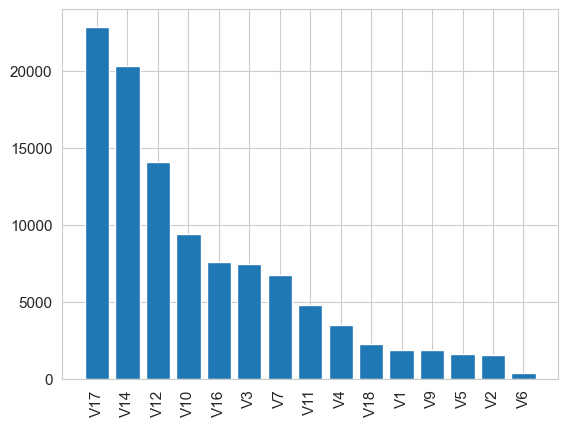

In [71]:
X_train_fs, X_test_fs, fs, k = select_features(X_train, y_train, X_test, k=k)

sorted_indices = np.argsort(fs.scores_)[::-1]

if k == 'all':
    k = len(X_train.columns)
top_k_indices = sorted_indices[:k]  # Limit to the top k features
print(f'Number of features={k}')

for i in top_k_indices:
    print('%s: %f' % (X_train.columns[i], fs.scores_[i]))

sorted_scores = fs.scores_[top_k_indices]

plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), X_train.columns[top_k_indices], rotation=90)
plt.show()